In [85]:
import os
import numpy as np
import skimage as sk
import skimage.io as skio
from skimage.filters import sobel
from skimage.transform import rescale

In [86]:
def ncc(img1, img2):
    n1 = np.ndarray.flatten(img1)/np.linalg.norm(img1)
    n2 = np.ndarray.flatten(img2)/np.linalg.norm(img2)
    return np.dot(n1, n2)


def find_displacement(pyramid_1, pyramid_2):
    best_dx, best_dy = 0, 0
    min_dist = float('-inf')

    for dx in range(-15, 16):
        for dy in range(-15, 16):
            trans = np.roll(pyramid_1[-1], (dx, dy), (1, 0))
            dist = ncc(trans, pyramid_2[-1])
            if dist > min_dist:
                min_dist = dist
                best_dx, best_dy = dx, dy

    for i in range(len(pyramid_1)-2, -1, -1):
        best_dx *= 2
        best_dy *= 2
        offset_x, offset_y = 0, 0
        min_dist = float('-inf')
        for dx in range(-1, 2):
            for dy in range(-1, 2):
                trans = np.roll(pyramid_1[i], (best_dx+dx, best_dy+dy), (1, 0))
                dist = ncc(trans, pyramid_2[i])
                if dist > min_dist:
                    min_dist = dist
                    offset_x, offset_y = dx, dy
        best_dx += offset_x
        best_dy += offset_y
    
    return best_dx, best_dy


def align(img_r, img_g, img_b):
    # edge detection
    edge_r = sobel(img_r)
    edge_g = sobel(img_g)
    edge_b = sobel(img_b)

    # make pyramid
    pyramid_r = [edge_r]
    pyramid_g = [edge_g]
    pyramid_b = [edge_b]

    while pyramid_r[-1].shape[0]>400 or pyramid_r[-1].shape[1]>400:
        pyramid_r.append(rescale(pyramid_r[-1], 0.5))
        pyramid_g.append(rescale(pyramid_g[-1], 0.5))
        pyramid_b.append(rescale(pyramid_b[-1], 0.5))

    # crop images
    for i in range(len(pyramid_r)):
        pyramid_r[i] = pyramid_r[i][int(0.1*pyramid_r[i].shape[0]): int(-0.1*pyramid_r[i].shape[0]), int(0.1*pyramid_r[i].shape[1]): int(-0.1*pyramid_r[i].shape[1])]
        pyramid_g[i] = pyramid_g[i][int(0.1*pyramid_g[i].shape[0]): int(-0.1*pyramid_g[i].shape[0]), int(0.1*pyramid_g[i].shape[1]): int(-0.1*pyramid_g[i].shape[1])]
        pyramid_b[i] = pyramid_b[i][int(0.1*pyramid_b[i].shape[0]): int(-0.1*pyramid_b[i].shape[0]), int(0.1*pyramid_b[i].shape[1]): int(-0.1*pyramid_b[i].shape[1])]
    
    # align r and b
    best_dxr, best_dyr = find_displacement(pyramid_r, pyramid_b)

    # align g and b
    best_dxg, best_dyg = find_displacement(pyramid_g, pyramid_b)

    return np.roll(img_r, (best_dxr, best_dyr), (1, 0)), np.roll(img_g, (best_dxg, best_dyg), (1, 0)), best_dxr, best_dyr, best_dxg, best_dyg

cathedral.jpg
R: (12, 3)
G: (5, 2)
[[[0.99215686 1.         1.        ]
  [0.99215686 0.98823529 0.99607843]
  [0.99215686 0.99607843 0.31372549]
  ...
  [0.99215686 0.99215686 0.98431373]
  [0.98823529 0.99215686 0.98823529]
  [0.98823529 0.99215686 0.98823529]]

 [[0.99215686 0.99607843 0.98039216]
  [0.99215686 0.99215686 1.        ]
  [0.99215686 0.99215686 0.40392157]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.98823529 0.99215686 0.99215686]
  [0.98823529 0.99215686 0.99215686]]

 [[0.99215686 0.98823529 0.98431373]
  [0.99215686 0.99215686 1.        ]
  [0.99215686 0.98823529 0.5254902 ]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.98823529 0.99215686 0.99607843]
  [0.98823529 0.99215686 0.99607843]]

 ...

 [[0.99215686 0.99215686 0.99215686]
  [0.98823529 0.99215686 0.98823529]
  [0.98823529 0.99215686 0.98431373]
  ...
  [0.83921569 0.99215686 0.99215686]
  [0.99607843 0.99215686 0.99607843]
  [0.98823529 0.99215686 0.99607843]]

 [[0.99215686 0.99215686 0.99215686]
  

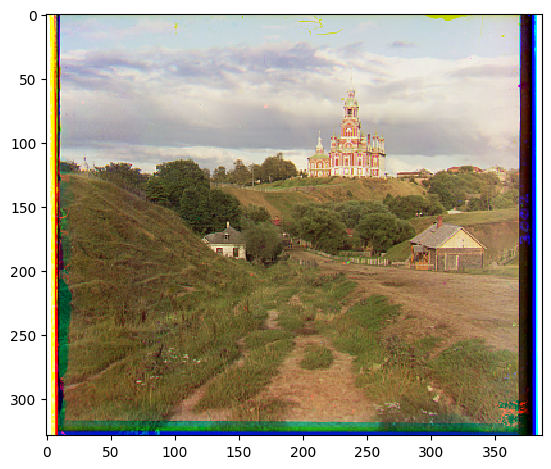


church.tif
R: (58, -4)
G: (25, 4)
[[[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 ...

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]

 [[1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]
  ...
  [1. 1. 1.]
  [1. 1. 1.]
  [1. 1. 1.]]]


KeyboardInterrupt: 

In [87]:
input_folder = "img"

for name in os.listdir(input_folder):
    img = skio.imread(os.path.join(input_folder, name))
    img = sk.img_as_float(img)

    # compute the height
    height = np.floor(img.shape[0] / 3.0).astype(int)

    # seperate color channels
    b = img[:height]
    g = img[height: 2*height]
    r = img[2*height: 3*height]

    # align
    ar, ag, r_dx, r_dy, g_dx, g_dy = align(r, g, b)
    print(f'{name}\nR: ({r_dy}, {r_dx})\nG: ({g_dy}, {g_dx})')

    # stack color channels
    output = np.dstack([ar, ag, b])
    output = output[max(0, max(r_dy, g_dy)):output.shape[0]-min(0, min(r_dy, g_dy)) , max(0, max(r_dx, g_dx)):output.shape[1]-min(0, min(r_dx, g_dx))]

    output_file = 'res/'+name
    skio.imsave(output_file, sk.img_as_ubyte(output))
    
    skio.imshow(output)
    skio.show()
    print()